In [1]:
import cv2
import numpy as np
import pickle
import cv2
import os
from os import listdir
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
#from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
tf.test.gpu_device_name()

''

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
default_image_size = tuple((128, 128))
## Function to convert image to array of 348 X 348
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [4]:
e_lables = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GroceryStoreDataset-master/dataset/classes.csv")
#print(e_lables)

image_list_a, label_list = [], []

totalImage = 0  # it is used to control total number of images for each class

root_dir = listdir("/content/drive/MyDrive/Colab Notebooks/GroceryStoreDataset-master/dataset/train") # Specify location of plant images

for image_folder in root_dir :  # Look for each folder
    # Look for All images in each folder
    
    
    image_list = listdir(f"/content/drive/MyDrive/Colab Notebooks/GroceryStoreDataset-master/dataset/train/{image_folder}")
#     print(image_list)

    for image in image_list:
          
        image_sub_cat = listdir(f"/content/drive/MyDrive/Colab Notebooks/GroceryStoreDataset-master/dataset/train/{image_folder}/{image}")
#         print(image_sub_cat)
     
        for image_sub_cat_name in image_sub_cat:
        
#             print(image_sub_cat_name)
            path  = f"/content/drive/MyDrive/Colab Notebooks/GroceryStoreDataset-master/dataset/train/{image_folder}/{image}/{image_sub_cat_name}"
            
            if os.path.isdir(path):  
                image_sub_cat_name_jpg = listdir(f"/content/drive/MyDrive/Colab Notebooks/GroceryStoreDataset-master/dataset/train/{image_folder}/{image}/{image_sub_cat_name}")
                
#                 print(image_sub_cat_name_jpg)

                for image_name in image_sub_cat_name_jpg:
#                     print(image_sub_cat_name)

#                     print(label_list.append(e_lables.loc[e_lables['Class'] == image_sub_cat_name].Class_ID.iloc[0]))
                    # print(e_lables.loc[e_lables['Coarse_Class'] == image].Coarse_Class_ID.iloc[0])
                    label_list.append(e_lables.loc[e_lables['Coarse_Class'] == image].Coarse_Class_ID.iloc[0])
                    if image_name.endswith(".jpg") == True or image_name.endswith(".JPG") == True or image_name.endswith(".jpeg") or image_name.endswith(".JPEG"):
                        image_full_path = f"/content/drive/MyDrive/Colab Notebooks/GroceryStoreDataset-master/dataset/train/{image_folder}/{image}/{image_sub_cat_name}/{image_name}"
                        image_list_a.append(convert_image_to_array(image_full_path))

            if os.path.isfile(path):
                #print(image_sub_cat_name)
                # print(e_lables.loc[e_lables['Class'] == image].Coarse_Class_ID.iloc[0])
                label_list.append(e_lables.loc[e_lables['Class'] == image].Coarse_Class_ID.iloc[0])
                
                if image_sub_cat_name.endswith(".jpg") == True or image_sub_cat_name.endswith(".JPG") == True or image_sub_cat_name.endswith(".jpeg") or image_sub_cat_name.endswith(".JPEG"):
                        image_full_path = f"/content/drive/MyDrive/Colab Notebooks/GroceryStoreDataset-master/dataset/train/{image_folder}/{image}/{image_sub_cat_name}"
                        image_list_a.append(convert_image_to_array(image_full_path))
    
# Convert images_list_a and lable_list to numpy array
image_list_a = np.asarray(image_list_a)
label_list = np.asarray(label_list)
print(max(label_list))

42


In [5]:
print(image_list_a.shape)
print(label_list.shape)

(18287, 128, 128, 3)
(18287,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(image_list_a, label_list, test_size=0.3, random_state = 42)

In [7]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape)
print(x_test.shape)

Total number of outputs :  28
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 28 29 30 31 32 33
 34 35 40 42]
(12800, 128, 128, 3)
(5487, 128, 128, 3)


In [8]:
input_shape = (128, 128, 3)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 128
dropout = 0.2

model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=64,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=128,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=128,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=256,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector

model.add(Dense(86))               
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(86))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(43))
model.add(Activation('softmax'))

In [9]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=60, batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/60
100/100 [==============================] - 392s 4s/step - loss: 2.9661 - accuracy: 0.2072 - val_loss: 2.3186 - val_accuracy: 0.3051
Epoch 2/60
100/100 [==============================] - 389s 4s/step - loss: 2.2100 - accuracy: 0.3109 - val_loss: 1.9466 - val_accuracy: 0.3716
Epoch 3/60
100/100 [==============================] - 388s 4s/step - loss: 1.7905 - accuracy: 0.4037 - val_loss: 1.3834 - val_accuracy: 0.5090
Epoch 4/60
100/100 [==============================] - 388s 4s/step - loss: 1.4156 - accuracy: 0.5102 - val_loss: 1.2184 - val_accuracy: 0.5624
Epoch 5/60
100/100 [==============================] - 387s 4s/step - loss: 1.1964 - accuracy: 0.5755 - val_loss: 0.9376 - val_accuracy: 0.6709
Epoch 6/60
100/100 [==============================] - 387s 4s/step - loss: 1.0009 - accuracy: 0.6412 - val_loss: 0.7767 - val_accuracy: 0.7219
Epoch 7/60
100/100 [==============================] - 386s 4s/step - loss: 0.8715 - accuracy: 0.6927 - val_loss: 0.6536 - val_accuracy: 0.7689

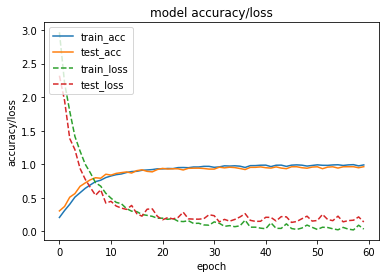

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'],'--')
plt.plot(history.history['val_loss'], '--')
plt.title('model accuracy/loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train_acc', 'test_acc', 'train_loss', 'test_loss'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Coarse_Grained_Model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Coarse_Grained_Model/assets


In [ ]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Augmented_Data_Coarse_Grained.csv')